In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
 train = pd.read_csv("/content/symptoms_names_only_excl.xlsx - symptoms_names_only_excl.csv")

In [8]:
test = train.sample(
    n=None, 
    frac=0.25, 
    replace=False, 
    weights=None, 
    random_state=None, 
    axis=None, 
    ignore_index=False
)

In [9]:
train.head()

,Column category,Related to digestive system or colonrectal cancer,related to final diagnosis,Consider Excluding,Column names,Symptoms (yes or no),Meaning,Notes,Cancer Types if symptomes
0,Target,NaN,1.0,1.0,Case_Control,NaN,Has colorectal cancer (1) or not (0).,"In the colorectal dataset, 1 corresponds to ""P...",NaN
1,Demographics,1.0,NaN,1.0,age_group,NaN,age group : 1 indicates =<70; 2 indicates >70,note sure what group it is refeering to yet,NaN
2,ICPC Diagnosis Code_number of visit \n*All 1-0...,1.0,NaN,NaN,code_D11_1st,1.0,ICPC-2: diarrhoea,NaN,NaN
3,NaN,1.0,NaN,NaN,code_D11_2nd,NaN,ICPC-2: diarrhoea,NaN,NaN
4,NaN,1.0,NaN,NaN,code_D12_1st,1.0,ICPC-2: constipation,NaN,NaN


In [10]:
test.head()

,Column category,Related to digestive system or colonrectal cancer,related to final diagnosis,Consider Excluding,Column names,Symptoms (yes or no),Meaning,Notes,Cancer Types if symptomes
655,NaN,NaN,NaN,NaN,time_before_dendriteA06_1st,NaN,NaN,NaN,NaN
117,NaN,1.0,NaN,NaN,code_D10_1st,1.0,ICPC-2: Vomiting,NaN,NaN
552,NaN,NaN,NaN,NaN,age_at_consultationQ99_1st,NaN,age at consultation for code_,NaN,NaN
831,NaN,NaN,NaN,NaN,time_before_dendriteL13_1st,NaN,NaN,NaN,NaN
873,NaN,NaN,NaN,NaN,time_before_dendriteR03_1st,NaN,NaN,NaN,NaN


In [11]:
test.shape

(314, 9)

In [12]:
train.shape

(1258, 9)

In [13]:
test.columns

Index(['Column category', 'Related to digestive system or colonrectal cancer',
       'related to final diagnosis', 'Consider Excluding', 'Column names',
       'Symptoms (yes or no)', 'Meaning', 'Notes',
       'Cancer Types if symptomes'],
      dtype='object')

In [14]:
train.columns

Index(['Column category', 'Related to digestive system or colonrectal cancer',
       'related to final diagnosis', 'Consider Excluding', 'Column names',
       'Symptoms (yes or no)', 'Meaning', 'Notes',
       'Cancer Types if symptomes'],
      dtype='object')

In [15]:
train["Meaning"].tolist()

['Has colorectal cancer (1) or not (0). ',
 'age group : 1 indicates =<70; 2 indicates >70',
 'ICPC-2: diarrhoea',
 'ICPC-2: diarrhoea',
 'ICPC-2: constipation',
 'ICPC-2: constipation',
 'ICPC-2: loss of appetite',
 'ICPC-2: loss of appetite',
 'ICPC-2: loss of weight',
 'ICPC-2: loss of weight',
 'Yes (1) No (0) column. No missing values',
 'Ranges from 0 - 12. No missing values. Number of 0s in this column matches with 0s in abdominal_pain',
 'ICPC-2: Rectal Bleeding',
 'ICPC-2: Rectal Bleeding',
 'Unique patient ID identifier.',
 'group code for conditional logistic regression (Not sure what this is for)',
 'female (1) or male (0)',
 'Age at diagnosis of cancer',
 'expected date of birth (in Stata format)',
 'Ranges from 40-96, no missing values. Not sure at which time point this is captured.',
 'Ranges from 1-4. Probably redundant as we can categorise the ages ourselves.\n1 - 40~60, 2 - 60~70, 3 - 70~80, 4 - 80~98',
 'localisation of tumor in colon. Ranges from 0-11. 1750 missing'

In [16]:
 text = ' '.join(str(train["Meaning"].tolist()))

In [17]:
counts = train["Meaning"].sample(frac=.07).value_counts()

In [18]:
counts

age at consultation for code_                                                                                                       29
haemoglobin                                                                                                                          1
blood test - sugar                                                                                                                   1
constipation. 1-0 column. No missing values. Not sure from which visit.                                                              1
Loaded as an object. Ranges from 1-5. Not sure what's the end of the scale. No missing values                                        1
ICPC-2: Swallowing problem                                                                                                           1
could be per rectal (digital rectal examination), probably a combination of the inv_PR_rectal columns (any signs of abnormality)     1
ICPC-2: Throat symptom/complaint                       

In [19]:
counts.index = counts.index.map(str)


In [ ]:
#wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(counts)
#plt.figure(figsize=(100, 100))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show(wordcloud)
 

In [20]:
test["Meaning"].tolist()

[nan,
 'ICPC-2: Vomiting',
 'age at consultation for code_',
 nan,
 nan,
 'ICPC-2: Shortness of breath/dyspnoea',
 'ICPC-2: General and Unspecified Sensitivity Test',
 'diarrhoea. Missing 117',
 'age at consultation for code_',
 'Midstream urine (MSU) culture growth',
 'age at consultation for code_',
 'peak flow test',
 'age at consultation for code_',
 'age at consultation for code_',
 'ICPC-2: Abdominal pain localized other',
 nan,
 'age at consultation for code_',
 'ICPC-2: Eye Other Reason for Encounter NEC',
 'age at consultation for code_',
 'age at consultation for code_',
 'ICPC-2: General and Unspecified Other Therapeutic Procedure NEC',
 nan,
 nan,
 'age at consultation for code_',
 nan,
 'ICPC-2: Respiratory Medical Exam/Eval-Complete',
 'age at consultation for code_',
 'ICPC-2: Urological Medical Exam/Eval-Complete',
 nan,
 'age at consultation for code_',
 'ICPC-2: Sputum/phlegm abnormal',
 'age at consultation for code_',
 'ICPC-2: Neoplasm digest benign/uncertain',
 na

In [21]:
 text = ' '.join(str(test["Meaning"].tolist()))

In [22]:
counts = test["Meaning"].sample(frac=.07).value_counts()

In [23]:
counts

age at consultation for code_                                                                                                       9
ICPC-2: Abrasion/scratch/blister                                                                                                    1
could be per rectal (digital rectal examination), probably a combination of the inv_PR_rectal columns (any signs of abnormality)    1
ICPC-2: Swollen ankles/oedema                                                                                                       1
blood pressure                                                                                                                      1
ICPC-2: Knee symptom/complaint                                                                                                      1
ICPC-2: Endocrine/Metabolic\nand Nutritional Medical Exam/Eval-Complete                                                             1
ICPC-2: Rectal bleeding                                       

In [ ]:
#wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(counts)
#plt.figure(figsize=(100, 100))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

In [24]:
test["Meaning"] = test["Meaning"] + ' ' + test['Meaning']
train["Meaning"] = train["Meaning"] + ' ' + train['Meaning']

In [25]:
test["Meaning"] = test["Meaning"].apply(lambda x: str(x).lower())
train["Meaning"] = train["Meaning"].apply(lambda x: str(x).lower())

In [26]:
test['class'] = 0
train['class'] = 1

In [27]:
test.columns

Index(['Column category', 'Related to digestive system or colonrectal cancer',
       'related to final diagnosis', 'Consider Excluding', 'Column names',
       'Symptoms (yes or no)', 'Meaning', 'Notes', 'Cancer Types if symptomes',
       'class'],
      dtype='object')

In [28]:
train.columns

Index(['Column category', 'Related to digestive system or colonrectal cancer',
       'related to final diagnosis', 'Consider Excluding', 'Column names',
       'Symptoms (yes or no)', 'Meaning', 'Notes', 'Cancer Types if symptomes',
       'class'],
      dtype='object')

In [29]:
test = test[["Meaning", "class"]]
train = train[["Meaning", "class"]]

In [30]:
test.head(10)

,Meaning,class
655,nan,0
117,icpc-2: vomiting icpc-2: vomiting,0
552,age at consultation for code_ age at consultat...,0
831,nan,0
873,nan,0
248,icpc-2: shortness of breath/dyspnoea icpc-2: s...,0
52,icpc-2: general and unspecified sensitivity te...,0
1244,diarrhoea. missing 117 diarrhoea. missing 117,0
553,age at consultation for code_ age at consultat...,0
1005,midstream urine (msu) culture growth midstream...,0


In [31]:
train.head(10)

,Meaning,class
0,has colorectal cancer (1) or not (0). has col...,1
1,age group : 1 indicates =<70; 2 indicates >70 ...,1
2,icpc-2: diarrhoea icpc-2: diarrhoea,1
3,icpc-2: diarrhoea icpc-2: diarrhoea,1
4,icpc-2: constipation icpc-2: constipation,1
5,icpc-2: constipation icpc-2: constipation,1
6,icpc-2: loss of appetite icpc-2: loss of appetite,1
7,icpc-2: loss of appetite icpc-2: loss of appetite,1
8,icpc-2: loss of weight icpc-2: loss of weight,1
9,icpc-2: loss of weight icpc-2: loss of weight,1


In [32]:
data = test.append(train, ignore_index=True)

In [33]:
data.sample(10)

,Meaning,class
45,nan,0
5,icpc-2: shortness of breath/dyspnoea icpc-2: s...,0
506,icpc-2: elevated blood pressure icpc-2: elevat...,1
314,has colorectal cancer (1) or not (0). has col...,1
1396,c-reactive protein (crp) test. 'btest' is mark...,1
1305,urinalysis investigation urinalysis investigation,1
348,icpc-2: weakness/tiredness general icpc-2: wea...,1
1261,nan,1
362,icpc-2: general and unspecified sensitivity te...,1
1052,nan,1


In [34]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4 MB 5.9 MB/s 
     |████████████████████████████████| 2.2 MB 38.9 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [35]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-cfgzhpxf
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-cfgzhpxf
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=ffc9243823a0089bdafe94713b1f29ca469077bc2d08d4f1ec7a5c705d4650e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-7dtzqoc6/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [36]:
import preprocess_kgptalkie as ps


In [37]:
data["Meaning"].apply(lambda x: ps.remove_special_chars(x))

0                                                     nan
1                           icpc2 vomiting icpc2 vomiting
2       age at consultation for code_ age at consultat...
3                                                     nan
4                                                     nan
                              ...                        
1567                      rectal bleeding rectal bleeding
1568                                      anaemia anaemia
1569                                      anaemia anaemia
1570    fecal occult blood test fobt fecal occult bloo...
1571    diarrhoea ranges from 1563 1989 missing values...
Name: Meaning, Length: 1572, dtype: object

In [38]:
data.head()

,Meaning,class
0,nan,0
1,icpc-2: vomiting icpc-2: vomiting,0
2,age at consultation for code_ age at consultat...,0
3,nan,0
4,nan,0


In [39]:
!pip install gensim==3.8.3

     |████████████████████████████████| 24.2 MB 18.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [40]:
import gensim

In [41]:
y = data['class'].values

In [42]:
data['Meaning'].tolist()

['nan',
 'icpc-2: vomiting icpc-2: vomiting',
 'age at consultation for code_ age at consultation for code_',
 'nan',
 'nan',
 'icpc-2: shortness of breath/dyspnoea icpc-2: shortness of breath/dyspnoea',
 'icpc-2: general and unspecified sensitivity test icpc-2: general and unspecified sensitivity test',
 'diarrhoea. missing 117 diarrhoea. missing 117',
 'age at consultation for code_ age at consultation for code_',
 'midstream urine (msu) culture growth midstream urine (msu) culture growth',
 'age at consultation for code_ age at consultation for code_',
 'peak flow test peak flow test',
 'age at consultation for code_ age at consultation for code_',
 'age at consultation for code_ age at consultation for code_',
 'icpc-2: abdominal pain localized other icpc-2: abdominal pain localized other',
 'nan',
 'age at consultation for code_ age at consultation for code_',
 'icpc-2: eye other reason for encounter nec icpc-2: eye other reason for encounter nec',
 'age at consultation for code_ 

In [43]:
x = [i.split() for i in data["Meaning"].tolist()]

In [44]:
print(x)

[['nan'], ['icpc-2:', 'vomiting', 'icpc-2:', 'vomiting'], ['age', 'at', 'consultation', 'for', 'code_', 'age', 'at', 'consultation', 'for', 'code_'], ['nan'], ['nan'], ['icpc-2:', 'shortness', 'of', 'breath/dyspnoea', 'icpc-2:', 'shortness', 'of', 'breath/dyspnoea'], ['icpc-2:', 'general', 'and', 'unspecified', 'sensitivity', 'test', 'icpc-2:', 'general', 'and', 'unspecified', 'sensitivity', 'test'], ['diarrhoea.', 'missing', '117', 'diarrhoea.', 'missing', '117'], ['age', 'at', 'consultation', 'for', 'code_', 'age', 'at', 'consultation', 'for', 'code_'], ['midstream', 'urine', '(msu)', 'culture', 'growth', 'midstream', 'urine', '(msu)', 'culture', 'growth'], ['age', 'at', 'consultation', 'for', 'code_', 'age', 'at', 'consultation', 'for', 'code_'], ['peak', 'flow', 'test', 'peak', 'flow', 'test'], ['age', 'at', 'consultation', 'for', 'code_', 'age', 'at', 'consultation', 'for', 'code_'], ['age', 'at', 'consultation', 'for', 'code_', 'age', 'at', 'consultation', 'for', 'code_'], ['icpc

In [45]:
type(x)

list

In [46]:
print(x[0])

['nan']


In [47]:
Dimension = 100
word_2_vec = gensim.models.Word2Vec(sentences=x, size=Dimension, window=10, min_count=1)


In [48]:
len(word_2_vec.wv.vocab)

663

In [49]:
word_2_vec.wv.vocab

{'"abnormal"': <gensim.models.keyedvectors.Vocab at 0x7febe9ae2850>,
 '"ca_suspected"?': <gensim.models.keyedvectors.Vocab at 0x7febe9ae28d0>,
 "'blotime'": <gensim.models.keyedvectors.Vocab at 0x7febe9ad48d0>,
 "'btest'": <gensim.models.keyedvectors.Vocab at 0x7febe9ae2a50>,
 "'inv_'": <gensim.models.keyedvectors.Vocab at 0x7febe9ad1ad0>,
 "'invtime',": <gensim.models.keyedvectors.Vocab at 0x7febe9ad4990>,
 '(0)': <gensim.models.keyedvectors.Vocab at 0x7febe9ad8410>,
 '(0).': <gensim.models.keyedvectors.Vocab at 0x7febe9ad81d0>,
 '(1)': <gensim.models.keyedvectors.Vocab at 0x7febe9ad8190>,
 '(349)': <gensim.models.keyedvectors.Vocab at 0x7febe9ad8f90>,
 '(any': <gensim.models.keyedvectors.Vocab at 0x7febe9ad4dd0>,
 '(crp)': <gensim.models.keyedvectors.Vocab at 0x7febe9ad4850>,
 '(digital': <gensim.models.keyedvectors.Vocab at 0x7febe9ad1510>,
 '(ecg)': <gensim.models.keyedvectors.Vocab at 0x7febe9ae2450>,
 '(esr)': <gensim.models.keyedvectors.Vocab at 0x7febe9abe850>,
 '(fobt)': <gens

In [51]:
word_2_vec['wheezing']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.04100293, -0.01925767,  0.0002539 ,  0.07422528,  0.06397084,
        0.05928319,  0.03861716,  0.02101531, -0.03676857,  0.03263602,
       -0.07477542, -0.07595558,  0.00840346,  0.02958656,  0.08775309,
       -0.01302563, -0.0789021 , -0.04398439, -0.00882111, -0.00865818,
        0.02513011,  0.06013228, -0.00764782,  0.12012648, -0.0543011 ,
       -0.00898645,  0.02855889,  0.05841475, -0.05593116,  0.04679487,
        0.04591921, -0.02559663, -0.03166572,  0.06358588,  0.00072118,
       -0.0218756 , -0.01995788, -0.05134667, -0.07186242, -0.00942841,
       -0.01823421,  0.03044731, -0.03323663,  0.01842494,  0.04202933,
        0.007154  , -0.03774454, -0.04339245,  0.08727296,  0.0119399 ,
        0.04756816,  0.03555886, -0.05443403, -0.0993202 , -0.05986002,
       -0.0327987 , -0.02340924, -0.04340168, -0.00208349, -0.01785661,
       -0.00781647, -0.0526619 , -0.01047918,  0.05533572,  0.03820863,
        0.05615622, -0.04360605,  0.08188751, -0.08752028, -0.10

In [52]:
word_2_vec.wv.most_similar('urethritis')

[('scores.', 0.9946425557136536),
 ('abnormal', 0.9946256875991821),
 ('tsh', 0.9945475459098816),
 ('visit', 0.994509756565094),
 ('hb', 0.994505763053894),
 ('??', 0.994470477104187),
 ('pressure', 0.9944693446159363),
 ('that', 0.9944645166397095),
 ('system.', 0.9944576025009155),
 ('fecal', 0.99445641040802)]

In [53]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [54]:
X = tokenizer.texts_to_sequences(x)

In [55]:
tokenizer.word_index

{'"abnormal"': 577,
 '"ca_suspected"?': 579,
 "'blotime'": 343,
 "'btest'": 580,
 "'inv_'": 326,
 "'invtime',": 345,
 '(0)': 251,
 '(0).': 423,
 '(1)': 203,
 '(349)': 462,
 '(any': 354,
 '(crp)': 175,
 '(digital': 56,
 '(ecg)': 391,
 '(esr)': 85,
 '(fobt)': 193,
 '(fobt).': 418,
 '(hba1c)': 81,
 '(in': 285,
 '(l)': 533,
 '(lft)': 94,
 '(likely': 110,
 '(msu)': 65,
 '(not': 367,
 '(psa)': 178,
 '(rbcs)': 264,
 '(thyroid-stimulating': 208,
 '(us)': 151,
 '(wcc)': 182,
 '(yes': 420,
 '+': 578,
 '-': 12,
 '.': 613,
 '0': 109,
 '0,': 416,
 '0-1': 61,
 '0-11.': 455,
 '0-150.': 623,
 '0-2,': 407,
 '0-2.': 254,
 '0-3.': 247,
 '0-32.': 612,
 '0-4.': 243,
 '0-40,': 616,
 '0-45,': 614,
 '0-5,': 630,
 '0-5.': 161,
 '0-6,': 642,
 '0-8.': 628,
 '0.': 352,
 '0s': 365,
 '1': 249,
 '1,': 135,
 '1-0': 143,
 '1-3.': 370,
 '1-4,': 297,
 '1-4.': 441,
 '1-5.': 585,
 '1-563.': 661,
 '1-6.': 584,
 '10.': 617,
 '11': 652,
 '117': 268,
 '12.': 426,
 '15.': 615,
 '164': 621,
 '1740': 597,
 '1744': 244,
 '1748': 

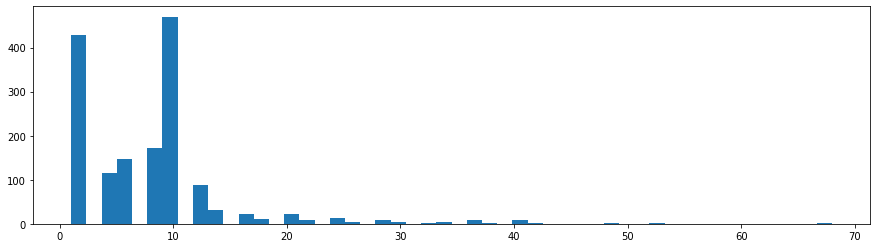

In [59]:
plt.figure(figsize=(15,4))
plt.hist([len(x) for x in X], bins=50)
plt.show()

In [60]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])


0

In [61]:
maxlen = 500
x = pad_sequences(X, maxlen=maxlen)

In [62]:
len(x[0])

500

In [63]:
len(x[3])

500

In [64]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [65]:
def get_weight_metrics(model):
  weight_matrix = np.zeros((vocab_size, Dimension))

  for word, i in vocab.items():
    weight_matrix[i] = word_2_vec.wv[word]

  return weight_matrix
   

In [66]:
embedding_vectors = get_weight_metrics(word_2_vec.wv)

In [67]:
embedding_vectors.shape

(664, 100)

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [69]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [71]:

Name = 'CRC dataset-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

In [72]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = Dimension, weights = [embedding_vectors], input_length = maxlen, trainable = False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          66400     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 183,777
Trainable params: 117,377
Non-trainable params: 66,400
_________________________________________________________________


In [74]:
x.shape

(1572, 500)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [76]:
type(X_train),type(y_train),X_train.shape

(numpy.ndarray, numpy.ndarray, (1179, 500))

In [77]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, callbacks=[tensorboard])

Epoch 1/100
26/26 [==============================] - 12s 62ms/step - loss: 0.5675 - acc: 0.7818 - val_loss: 0.4849 - val_acc: 0.8079
Epoch 2/100
26/26 [==============================] - 1s 33ms/step - loss: 0.5157 - acc: 0.7964 - val_loss: 0.4949 - val_acc: 0.8079
Epoch 3/100
26/26 [==============================] - 1s 38ms/step - loss: 0.5085 - acc: 0.7964 - val_loss: 0.4898 - val_acc: 0.8079
Epoch 4/100
26/26 [==============================] - 1s 34ms/step - loss: 0.5074 - acc: 0.7964 - val_loss: 0.5011 - val_acc: 0.8079
Epoch 5/100
26/26 [==============================] - 1s 34ms/step - loss: 0.5090 - acc: 0.7964 - val_loss: 0.4928 - val_acc: 0.8079
Epoch 6/100
26/26 [==============================] - 1s 33ms/step - loss: 0.5040 - acc: 0.7964 - val_loss: 0.4920 - val_acc: 0.8079
Epoch 7/100
26/26 [==============================] - 1s 34ms/step - loss: 0.5035 - acc: 0.7964 - val_loss: 0.4900 - val_acc: 0.8079
Epoch 8/100
26/26 [==============================] - 1s 37ms/step - loss: 0

In [78]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [79]:
accuracy_score(y_test, y_pred)

0.7811704834605598

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.80      0.97      0.88       315

    accuracy                           0.78       393
   macro avg       0.40      0.49      0.44       393
weighted avg       0.64      0.78      0.70       393



In [81]:
#Code used to test other texts if you want to know whether they are fake / real
#An example is provided below for testing

x = ['Hoy el gobierno colombiano hizo cambios a la ley de inmigración']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [82]:
#Our model predicted the above sentence as being true
(model.predict(x) >= 0.5).astype(int)

array([[1]])

In [83]:
!pip install tensorboard

In [84]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [ ]:
#How to run this model in Tensorboard
#Create a logs folder on your system
#In the folders tab in Colab, download the events files after running the model
#Save the event files to your logs folder
#In a command terminal write the following commands: tensorboard --logdir=logs
#After that, tensorboard will provide a url
#Copy the url into a new tab to see the metrics
